# No data reduction - Decision Tree
- This notebook will explore different architectures and hyperparameters of the `DecisionTreeClassifier` looking for an optimal configuration. In this case, the Dataset **without dimensionality reduction** will be used. In other words, all the features of the original dataset are going to be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Romero Romero, Martín
- Nunez Sánchez, Fernando 

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
using Statistics
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed = 42
Random.seed!(seed)

TaskLocalRNG()

In [10]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

## Loading data
- The only preprocessing applied to the data was a Min-Max normalization.

In [3]:
file = h5open("ndr_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [4]:
model = :DecisionTree
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = [];

In [5]:
# Define an array of hyperparameter dictionaries for the Decision Tree model
hyperparameters = [
    Dict(:max_depth => 10, :random_state => seed),
    Dict(:max_depth => 20, :random_state => seed),
    Dict(:max_depth => 50, :random_state => seed),
    Dict(:max_depth => 20, :random_state => seed),
    Dict(:max_depth => 50, :random_state => seed),
    Dict(:max_depth => 100, :random_state => seed) # Deeper trees can capture more detail but risk overfitting
]


# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 1 -> 0.822 ± 0.031
Hyperparams set 2 -> 0.821 ± 0.028
Hyperparams set 3 -> 0.821 ± 0.028
Hyperparams set 4 -> 0.821 ± 0.028
Hyperparams set 5 -> 0.821 ± 0.028
Hyperparams set 6 -> 0.821 ± 0.028

----- sensitivity means -----
Hyperparams set 1 -> 0.822 ± 0.031
Hyperparams set 2 -> 0.821 ± 0.028
Hyperparams set 3 -> 0.821 ± 0.028
Hyperparams set 4 -> 0.821 ± 0.028
Hyperparams set 5 -> 0.821 ± 0.028
Hyperparams set 6 -> 0.821 ± 0.028

----- specificity means -----
Hyperparams set 1 -> 0.939 ± 0.012
Hyperparams set 2 -> 0.939 ± 0.012
Hyperparams set 3 -> 0.939 ± 0.012
Hyperparams set 4 -> 0.939 ± 0.012
Hyperparams set 5 -> 0.939 ± 0.012
Hyperparams set 6 -> 0.939 ± 0.012

----- ppv means -----
Hyperparams set 2 -> 0.827 ±

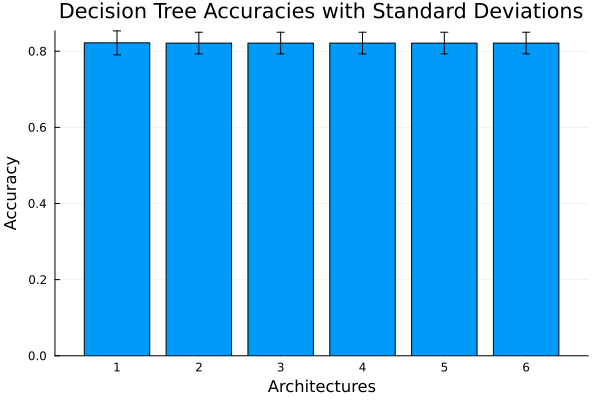

In [6]:
plot_acc_comparison(model, all_metrics)

## Discussion

In this initial experiment, a good performance of the models is observed. All the trees show similar performances, with accuracy rates around 0.8, the best being the tree with a depth of **10**, achieving an accuracy of **0.822 ± 0.031**. In the next experiment, we will test depths close to 20, using both the `gini` index, which is the default, and `entropy`, to see which yields better results in this case

In [7]:
hyperparameters = [
    Dict(:max_depth => 6, :random_state => seed),
    Dict(:max_depth => 8, :random_state => seed),
    Dict(:max_depth => 10, :random_state => seed),
    Dict(:max_depth => 12, :random_state => seed),
    Dict(:max_depth => 14, :random_state => seed),
    Dict(:max_depth => 6, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 8, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 10, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 12, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 14, :criterion => "entropy", :random_state => seed)
]

all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9
Training with set of hyperparameters 10

----- acc means -----
Hyperparams set 6 -> 0.849 ± 0.026
Hyperparams set 7 -> 0.846 ± 0.03
Hyperparams set 9 -> 0.841 ± 0.035
Hyperparams set 10 -> 0.841 ± 0.035
Hyperparams set 8 -> 0.84 ± 0.033
Hyperparams set 1 -> 0.828 ± 0.033
Hyperparams set 2 -> 0.824 ± 0.034
Hyperparams set 3 -> 0.822 ± 0.031
Hyperparams set 4 -> 0.819 ± 0.034
Hyperparams set 5 -> 0.817 ± 0.039

----- sensitivity means -----
Hyperparams set 6 -> 0.849 ± 0.026
Hyperparams set 7 -> 0.846 ± 0.03
Hyperparams set 9 -> 0.841 ± 0.035
Hyperparams set 10 -> 0.841 ± 0.035
Hyperparams set 8 -> 0.84 ± 0.033
Hyperparams set 1 -> 0.828 ± 0.0

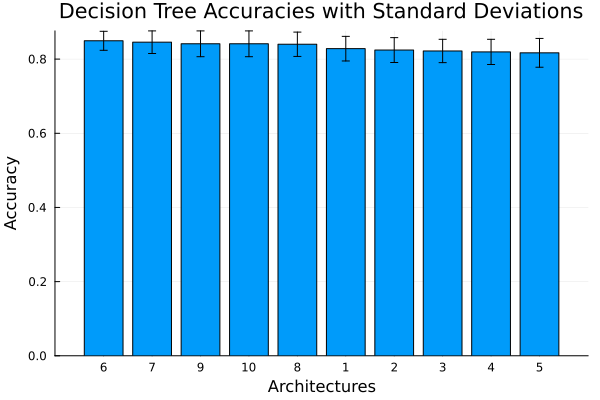

In [8]:
plot_acc_comparison(model, all_metrics)

### Discussion

In this case, a slight improvement in performance is observed when using `entropy` as the criterion. Although this improvement is not very significant, it is noted that in general, all models that have used this metric have achieved better results in this experiment.

It is also observed that after testing various depths, the best one using `gini` was a depth of 6.


## Final discussion

Finally, as can be seen in the graph below, the best model is obtained in the last experiment, with the following hyperparameters:

1. `max_depth`: `6`
2. `criterion`: `"entropy"`

This results in an accuracy of **0.849 ± 0.026**. Throughout the second experiment, a slight improvement in the model's precision has been achieved, and we consider the obtained accuracy rate to be quite acceptable.

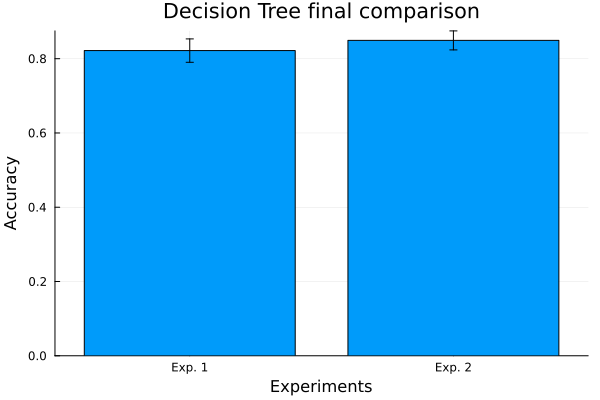

In [9]:
plot_final_comparison("Decision Tree final comparison", best_models_acc)